**EDA** <br/> (Exploratory Data Analysis)

In [48]:
# Libraries
import os
from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2


In [49]:
# All data
print(os.listdir('../input'))

['sample_submission.csv', 'test_images', 'train_images', 'test.csv', 'train.csv']


In [50]:
# Data path
train_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test.csv')
sub = pd.read_csv('../input/sample_submission.csv')
train_dir = '../input/train_images'
test_dir = '../input/test_images'

In [51]:
print('Total images for train {0}'.format(len(os.listdir(train_dir))))
print('Total images for test {0}'.format(len(os.listdir(test_dir))))

Total images for train 196086
Total images for test 153730


In [52]:
train_df.iloc[100:110]

,category_id,date_captured,file_name,frame_num,id,location,rights_holder,seq_id,seq_num_frames,width,height
100,0,2014-05-23 15:12:10,5930ff91-23d2-11e8-a6a3-ec086b02610b.jpg,1,5930ff91-23d2-11e8-a6a3-ec086b02610b,96,Erin Boydston,6fb629bd-5567-11e8-ad1f-dca9047ef277,1,1024,747
101,0,2014-08-19 10:35:14,58fa5e1e-23d2-11e8-a6a3-ec086b02610b.jpg,1,58fa5e1e-23d2-11e8-a6a3-ec086b02610b,114,Erin Boydston,7005ece1-5567-11e8-b251-dca9047ef277,1,1024,747
102,0,2014-05-12 12:50:39,58fbecb5-23d2-11e8-a6a3-ec086b02610b.jpg,1,58fbecb5-23d2-11e8-a6a3-ec086b02610b,96,Erin Boydston,6fb0b97a-5567-11e8-90ec-dca9047ef277,1,1024,747
103,0,2013-12-07 08:07:32,589e66cd-23d2-11e8-a6a3-ec086b02610b.jpg,1,589e66cd-23d2-11e8-a6a3-ec086b02610b,106,Erin Boydston,6f6aca3a-5567-11e8-b4d4-dca9047ef277,1,1024,747
104,0,2014-05-07 14:29:28,58a0218a-23d2-11e8-a6a3-ec086b02610b.jpg,1,58a0218a-23d2-11e8-a6a3-ec086b02610b,96,Erin Boydston,6fa15691-5567-11e8-a134-dca9047ef277,1,1024,747
105,11,2011-10-10 18:43:46,59e5de60-23d2-11e8-a6a3-ec086b02610b.jpg,2,59e5de60-23d2-11e8-a6a3-ec086b02610b,43,Justin Brown,6f0b7442-5567-11e8-ba49-dca9047ef277,3,1024,747
106,0,2014-05-11 13:32:39,5979be0e-23d2-11e8-a6a3-ec086b02610b.jpg,1,5979be0e-23d2-11e8-a6a3-ec086b02610b,26,Erin Boydston,6f3b5e30-5567-11e8-a852-dca9047ef277,1,1024,747
107,4,2012-03-18 06:00:56,5a0e36da-23d2-11e8-a6a3-ec086b02610b.jpg,3,5a0e36da-23d2-11e8-a6a3-ec086b02610b,33,Justin Brown,6f0a0f26-5567-11e8-a8f1-dca9047ef277,3,1024,747
108,0,2013-10-16 16:00:00,591cb1d8-23d2-11e8-a6a3-ec086b02610b.jpg,1,591cb1d8-23d2-11e8-a6a3-ec086b02610b,96,Erin Boydston,6f90cd17-5567-11e8-9829-dca9047ef277,1,1024,747
109,19,2011-04-23 12:04:56,598495cf-23d2-11e8-a6a3-ec086b02610b.jpg,2,598495cf-23d2-11e8-a6a3-ec086b02610b,33,Justin Brown,6f07df63-5567-11e8-b7c6-dca9047ef277,3,1024,747


In [53]:
test_df.iloc[100:110]

,date_captured,file_name,frame_num,id,location,rights_holder,seq_id,seq_num_frames,width,height
100,2016-01-04 07:30:00,c18776b8-2bf6-11e9-bcad-06f10d5896c4.jpg,1,c18776b8-2bf6-11e9-bcad-06f10d5896c4,37,Idaho Department of Fish and Game,6e9b0530-2e32-11e9-b5d8-dca9047ef277,1,1024,726
101,2016-01-04 07:35:00,c18776b9-2bf6-11e9-bcad-06f10d5896c4.jpg,1,c18776b9-2bf6-11e9-bcad-06f10d5896c4,37,Idaho Department of Fish and Game,6e9b056e-2e32-11e9-96ec-dca9047ef277,1,1024,726
102,2016-01-04 07:40:00,c18776ba-2bf6-11e9-bcad-06f10d5896c4.jpg,1,c18776ba-2bf6-11e9-bcad-06f10d5896c4,37,Idaho Department of Fish and Game,6e9b05b3-2e32-11e9-9837-dca9047ef277,1,1024,726
103,2016-01-04 07:45:00,c18776bb-2bf6-11e9-bcad-06f10d5896c4.jpg,1,c18776bb-2bf6-11e9-bcad-06f10d5896c4,37,Idaho Department of Fish and Game,6e9b05f8-2e32-11e9-9925-dca9047ef277,1,1024,726
104,2016-01-04 07:50:00,c18776bc-2bf6-11e9-bcad-06f10d5896c4.jpg,1,c18776bc-2bf6-11e9-bcad-06f10d5896c4,37,Idaho Department of Fish and Game,6e9b0638-2e32-11e9-a7b9-dca9047ef277,1,1024,726
105,2016-01-04 07:55:00,c18776bd-2bf6-11e9-bcad-06f10d5896c4.jpg,1,c18776bd-2bf6-11e9-bcad-06f10d5896c4,37,Idaho Department of Fish and Game,6e9b067d-2e32-11e9-9ff3-dca9047ef277,1,1024,726
106,2016-01-04 08:00:00,c2bbdf08-2bf6-11e9-bcad-06f10d5896c4.jpg,1,c2bbdf08-2bf6-11e9-bcad-06f10d5896c4,37,Idaho Department of Fish and Game,6e9b06c2-2e32-11e9-b099-dca9047ef277,1,1024,726
107,2016-01-04 08:05:00,c2bbdf09-2bf6-11e9-bcad-06f10d5896c4.jpg,1,c2bbdf09-2bf6-11e9-bcad-06f10d5896c4,37,Idaho Department of Fish and Game,6e9b06fd-2e32-11e9-a0aa-dca9047ef277,1,1024,726
108,2016-01-04 08:10:00,c2bbdf0a-2bf6-11e9-bcad-06f10d5896c4.jpg,1,c2bbdf0a-2bf6-11e9-bcad-06f10d5896c4,37,Idaho Department of Fish and Game,6e9b0745-2e32-11e9-858f-dca9047ef277,1,1024,726
109,2016-01-04 08:15:00,c2bbdf0b-2bf6-11e9-bcad-06f10d5896c4.jpg,1,c2bbdf0b-2bf6-11e9-bcad-06f10d5896c4,37,Idaho Department of Fish and Game,6e9b078a-2e32-11e9-9280-dca9047ef277,1,1024,726


In [54]:
test_df.iloc[100:110]

,date_captured,file_name,frame_num,id,location,rights_holder,seq_id,seq_num_frames,width,height
100,2016-01-04 07:30:00,c18776b8-2bf6-11e9-bcad-06f10d5896c4.jpg,1,c18776b8-2bf6-11e9-bcad-06f10d5896c4,37,Idaho Department of Fish and Game,6e9b0530-2e32-11e9-b5d8-dca9047ef277,1,1024,726
101,2016-01-04 07:35:00,c18776b9-2bf6-11e9-bcad-06f10d5896c4.jpg,1,c18776b9-2bf6-11e9-bcad-06f10d5896c4,37,Idaho Department of Fish and Game,6e9b056e-2e32-11e9-96ec-dca9047ef277,1,1024,726
102,2016-01-04 07:40:00,c18776ba-2bf6-11e9-bcad-06f10d5896c4.jpg,1,c18776ba-2bf6-11e9-bcad-06f10d5896c4,37,Idaho Department of Fish and Game,6e9b05b3-2e32-11e9-9837-dca9047ef277,1,1024,726
103,2016-01-04 07:45:00,c18776bb-2bf6-11e9-bcad-06f10d5896c4.jpg,1,c18776bb-2bf6-11e9-bcad-06f10d5896c4,37,Idaho Department of Fish and Game,6e9b05f8-2e32-11e9-9925-dca9047ef277,1,1024,726
104,2016-01-04 07:50:00,c18776bc-2bf6-11e9-bcad-06f10d5896c4.jpg,1,c18776bc-2bf6-11e9-bcad-06f10d5896c4,37,Idaho Department of Fish and Game,6e9b0638-2e32-11e9-a7b9-dca9047ef277,1,1024,726
105,2016-01-04 07:55:00,c18776bd-2bf6-11e9-bcad-06f10d5896c4.jpg,1,c18776bd-2bf6-11e9-bcad-06f10d5896c4,37,Idaho Department of Fish and Game,6e9b067d-2e32-11e9-9ff3-dca9047ef277,1,1024,726
106,2016-01-04 08:00:00,c2bbdf08-2bf6-11e9-bcad-06f10d5896c4.jpg,1,c2bbdf08-2bf6-11e9-bcad-06f10d5896c4,37,Idaho Department of Fish and Game,6e9b06c2-2e32-11e9-b099-dca9047ef277,1,1024,726
107,2016-01-04 08:05:00,c2bbdf09-2bf6-11e9-bcad-06f10d5896c4.jpg,1,c2bbdf09-2bf6-11e9-bcad-06f10d5896c4,37,Idaho Department of Fish and Game,6e9b06fd-2e32-11e9-a0aa-dca9047ef277,1,1024,726
108,2016-01-04 08:10:00,c2bbdf0a-2bf6-11e9-bcad-06f10d5896c4.jpg,1,c2bbdf0a-2bf6-11e9-bcad-06f10d5896c4,37,Idaho Department of Fish and Game,6e9b0745-2e32-11e9-858f-dca9047ef277,1,1024,726
109,2016-01-04 08:15:00,c2bbdf0b-2bf6-11e9-bcad-06f10d5896c4.jpg,1,c2bbdf0b-2bf6-11e9-bcad-06f10d5896c4,37,Idaho Department of Fish and Game,6e9b078a-2e32-11e9-9280-dca9047ef277,1,1024,726


So, we must make prediction for each picture **"What category does the animal in the picture belong to?"** (column name - "category_id")

In [55]:
# code from https://www.kaggle.com/gpreda/iwildcam-2019-eda

classes_wild = {0: 'empty', 1: 'deer', 2: 'moose', 3: 'squirrel', 4: 'rodent', 5: 'small_mammal', \
                6: 'elk', 7: 'pronghorn_antelope', 8: 'rabbit', 9: 'bighorn_sheep', 10: 'fox', 11: 'coyote', \
                12: 'black_bear', 13: 'raccoon', 14: 'skunk', 15: 'wolf', 16: 'bobcat', 17: 'cat',\
                18: 'dog', 19: 'opossum', 20: 'bison', 21: 'mountain_goat', 22: 'mountain_lion'}

train_df['classes_wild'] = train_df['category_id'].apply(lambda cw: classes_wild[cw])

In [56]:
# Category distribution
train_df['classes_wild'].value_counts()

empty            131457
opossum           14106
raccoon            8623
coyote             7209
rabbit             6938
deer               6102
bobcat             5975
cat                4759
squirrel           3398
dog                3035
rodent             2210
skunk              1361
fox                1093
mountain_lion        33
Name: classes_wild, dtype: int64

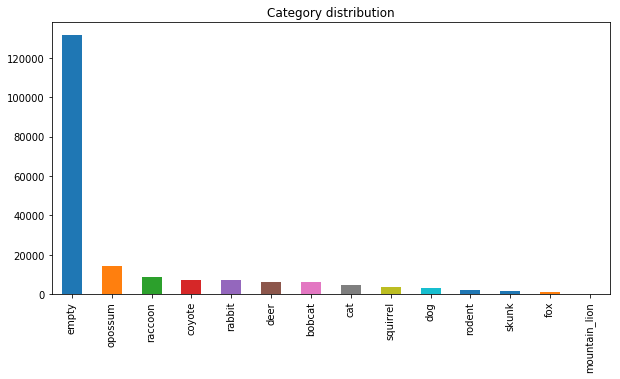

In [57]:
plt.figure(figsize=(10,5))
train_df['classes_wild'].value_counts().plot(kind='bar',  title="Category distribution",);
plt.show()

Now drawing images samples for each class

In [58]:
def image_plotting(df, category, data_dir=train_dir):
    data_dir = data_dir
    df = train_df[train_df['classes_wild']== category]
    df = df[['classes_wild', 'file_name']]
    plt.rcParams['figure.figsize'] = (15, 15)
    plt.subplots_adjust(wspace=0, hspace=0)
    i_ = 0
    
    
    for l in range(25):
        cat, img_name = df.sample(1).values[0]
        path = os.path.join(train_dir, img_name)

        img = cv2.imread(path)
        img = cv2.resize(img, (256, 256)) 

        plt.subplot(5, 5, i_+1) #.set_title(l)
        plt.imshow(img); plt.axis('off')
        i_ += 1
    print(cat)

In [ ]:
image_plotting(data_dir=train_dir,category='bobcat',df=train_df)

In [ ]:
image_plotting(train_df, 'cat')

In [ ]:
image_plotting(train_df, 'coyote')

In [ ]:
image_plotting(train_df, 'deer')

In [ ]:
image_plotting(train_df, 'dog')

In [ ]:
image_plotting(train_df, 'empty')

In [ ]:
image_plotting(train_df, 'fox')

In [ ]:
image_plotting(train_df, 'mountain_lion' )

In [ ]:
image_plotting(train_df, 'opossum' )

In [ ]:
image_plotting(train_df, 'rabbit')

In [ ]:
image_plotting(train_df, 'raccoon' )

In [ ]:
image_plotting(train_df, 'rodent' )

In [ ]:
image_plotting(train_df, 'skunk' )

In [ ]:
image_plotting(train_df, 'squirrel' )

From what i saw, i realized that i almost can't see the rodents 
such as : rodent, squirrel, and raccoon.

But neural net is not my eyes - handle

**Creating the  ResNet model from scratch**

In [ ]:
# Libraries
import torch
import torch.nn as nn
import torchvision
from torchvision.transforms import transforms
from torch.utils.data import Dataset, DataLoader
from torchvision import models

from sklearn.model_selection import train_test_split

Data and generator preparation

In [ ]:
train_df = train_df[['file_name','category_id']]
train_df.head()


In [ ]:
# code lightly modified from https://www.kaggle.com/ateplyuk/iwildcam2019-pytorch-starter
category = train_df['category_id'].unique()

encoder = dict([(v, k) for v, k in zip(category, range(len(category)))])
decoder = dict([(v, k) for k, v in encoder.items()])


print( pd.DataFrame({
    'Before encoding': list(encoder.keys()),
    'After encoding': list(encoder.values())}).to_string(index=False))


def encoding(labels):
        return encoder[int(labels)]

In [ ]:
train_df['category_id'] = train_df['category_id'].apply(encoding)
train_df['category_id'].value_counts()

In [ ]:
# Custom data generator
class WildDataset(Dataset):
    def __init__(self, df, img_dir, transforms=None):
        self.df = df
        self.img_dir = img_dir
        self.transforms = transforms
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        img_name = os.path.join(self.img_dir,
                               self.df.iloc[idx, 0])
        image = cv2.imread(img_name)
        label = self.df.iloc[idx, 1]
        if self.transforms is not None:
            image = self.transforms(image)
        return image, label

In [ ]:
train, val = train_test_split(train_df, stratify=train_df.category_id, test_size=0.1)
len(train), len(val)

In [ ]:
# Augmentations for data

aug = transforms.Compose([transforms.ToPILImage(),                          
                          transforms.Resize((32, 32)),
                          transforms.ToTensor(),
                          transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                             ])




In [ ]:
# iWildCam dataset
dataset_train = WildDataset(df=train,
                            img_dir=train_dir,
                            transforms=aug)

dataset_valid = WildDataset(df=val,
                           img_dir=train_dir,
                           transforms=aug)

# Data loader
train_loader = DataLoader(dataset=dataset_train, batch_size=24, shuffle=True)
val_loader = DataLoader(dataset_valid, batch_size=24, shuffle=False, num_workers=0)

In [ ]:
# Aug for data img
def show_aug(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.figure(figsize=(20,15))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

    
# Get a batch of training data
inputs, _ = next(iter(train_loader))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs, 4)  

show_aug(out)

In [ ]:
_

In [ ]:
_.shape

**Model**

In [ ]:
## Parameters for model

# Hyper parameters
num_epochs = 2
num_classes = 14
learning_rate = 0.02

# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
# 3x3 convolution
def conv3x3(in_channels, out_channels, stride=1):
    return nn.Conv2d(in_channels, out_channels, kernel_size=3, 
                     stride=stride, padding=1, bias=False)

  
# Residual block
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(ResidualBlock, self).__init__()
        self.conv1 = conv3x3(in_channels, out_channels, stride)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(out_channels, out_channels)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = downsample
        
    def forward(self, x):
        residual = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        if self.downsample:
            residual = self.downsample(x)
        out += residual
        out = self.relu(out)
        return out
      
      
      
# ResNet
class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=14):
        super(ResNet, self).__init__()
        self.in_channels = 16
        self.conv = conv3x3(3, 16)
        self.bn = nn.BatchNorm2d(16)
        self.relu = nn.LeakyReLU(inplace=True)
        self.layer1 = self.make_layer(block, 16, layers[0])
        self.layer2 = self.make_layer(block, 32, layers[1], 2)
        self.layer3 = self.make_layer(block, 64, layers[2], 2)
        self.layer4 = self.make_layer(block, 128, layers[3], 2)
        self.avg_pool = nn.AdaptiveAvgPool2d(4)
        self.fc = nn.Linear(128, num_classes)
        
    def make_layer(self, block, out_channels, blocks, stride=1):
        downsample = None
        if (stride != 1) or (self.in_channels != out_channels):
            downsample = nn.Sequential(
                conv3x3(self.in_channels, out_channels, stride=stride),
                nn.BatchNorm2d(out_channels))
        layers = []
        layers.append(block(self.in_channels, out_channels, stride, downsample))
        self.in_channels = out_channels
        for i in range(1, blocks):
            layers.append(block(out_channels, out_channels))
        return nn.Sequential(*layers)
    
    def forward(self, x):
        out = self.conv(x)
        out = self.bn(out)
        out = self.relu(out)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.avg_pool(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out
      
      
      
def create_resnet_model(output_dim: int = 1) -> nn.Module:
    model = ResNet(ResidualBlock, [2, 2, 2, 2])
    in_features = model.fc.in_features
    model.avg_pool = nn.AdaptiveAvgPool2d(1)
    model.fc = nn.Linear(in_features, output_dim)
    model = model.to(device)
    return model

model = create_resnet_model(output_dim=num_classes)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adamax(model.parameters(), lr=learning_rate)

In [ ]:

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ("Epoch [{}/{}], Step [{}/{}] Loss: {:.4f}"
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))


In [ ]:
# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in val_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the model on the 19630 test images: {} %'.format(100 * correct / total))


**Prediction and submission**

In [ ]:
sub = pd.read_csv('../input/sample_submission.csv')
sub['Id'] = sub['Id'] + '.jpg'
sub.head()

In [ ]:
# Dataset for test img
dataset_valid = WildDataset(df=sub,
                           img_dir=test_dir,
                           transforms=aug)

# Data loader
test_loader = DataLoader(dataset_valid, batch_size=24, shuffle=False)

In [ ]:
# Test the model
model.eval()
preds = []
#with torch.no_grad():
for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    predicted
    for i in predicted.detach().cpu().numpy():
        preds.append(i)


In [ ]:
sub['Predicted'] =  preds
sub['Id'] = sub['Id'].str[:-4]
sub.head()


In [ ]:

def decoding(labels):
        return decoder[int(labels)]

In [ ]:
sub['Predicted'] = sub['Predicted'].apply(decoding)
sub.head()

sub.to_csv('submission.csv', index=False)

In [ ]:
sub['Predicted'].value_counts()